In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import poisson

#Se cargan los datos

Los datos se obtuvieron del Proyecto POWER del Centro de Investigaci ́on Langley de la NASA (LaRC), financiado a través del Programa de Ciencias Aplicadas/Ciencias de la Tierra de la NASA.

Cita: The POWER Project. [2021]. NASA Fecha de consulta: 12 de junio de 2023
Consultado de: https://power.larc.nasa.gov/

In [ ]:
dfhora = pd.read_csv('/content/datoshora.txt')
dfhora

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,WS50M
0,2020,12,31,17,8.43,5.43
1,2020,12,31,18,0.00,4.40
2,2020,12,31,19,0.00,3.30
3,2020,12,31,20,0.00,2.54
4,2020,12,31,21,0.00,1.96
...,...,...,...,...,...,...
8755,2021,12,31,12,754.96,3.55
8756,2021,12,31,13,695.31,3.96
8757,2021,12,31,14,544.05,4.09
8758,2021,12,31,15,349.55,4.12


#Energía solar

In [ ]:
dfhora[(dfhora["YEAR"] == 2021) & (8 <= dfhora["HR"])& (dfhora["HR"] <= 17) ].mean()

YEAR                 2021.000000
MO                      6.524527
DY                     15.716361
HR                     12.498767
ALLSKY_SFC_SW_DWN     556.757059
WS50M                   3.696662
dtype: float64

Entre las 8:00 a.m y las 5:00 p.m se tiene una radiacion promedio de 556 W/m^2

[]

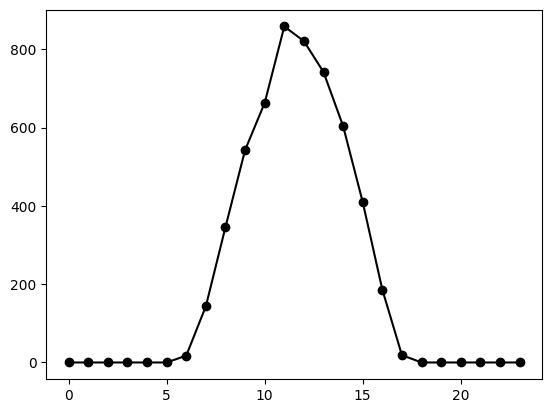

In [ ]:
plt.plot(dfhora[(dfhora["MO"] == 1) & (dfhora["DY"] == 28)]["HR"], dfhora[(dfhora["MO"] == 1) & (dfhora["DY"] == 28)]["ALLSKY_SFC_SW_DWN"], "-ko")
plt.ylabel("Tiempo")
plt.xlabel("Irradiancia solar [W/m^2]")

plt.plot()

En la gráfica anterior es posible notar que la radiacion solar es mayor en el horario de 9:00 a.m a 3:00 p.m

#Energía eólica

[]

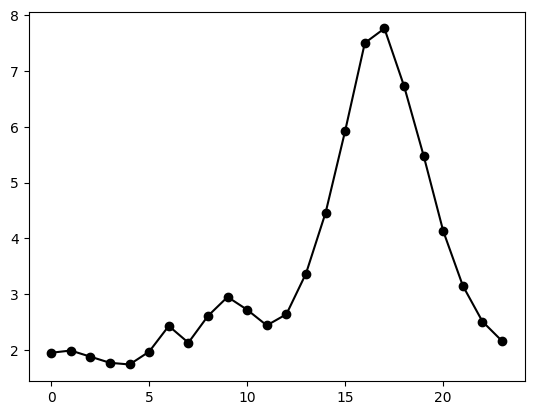

In [ ]:
Mes = 1
Dia = 30

plt.plot(dfhora[ (dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["HR"], dfhora[(dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["WS50M"], "-ko")
plt.ylabel("Tiempo")
plt.xlabel("Velocidad del viento [m/s]")

plt.plot()

[]

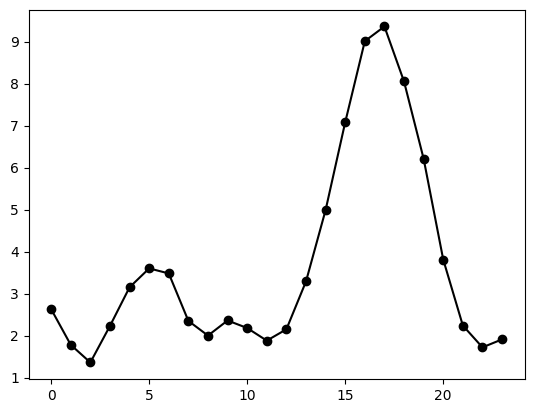

In [ ]:
Mes = 2
Dia = 23

plt.plot(dfhora[ (dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["HR"], dfhora[(dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["WS50M"], "-ko")
plt.ylabel("Tiempo")
plt.xlabel("Velocidad del viento [m/s]")

plt.plot()

[]

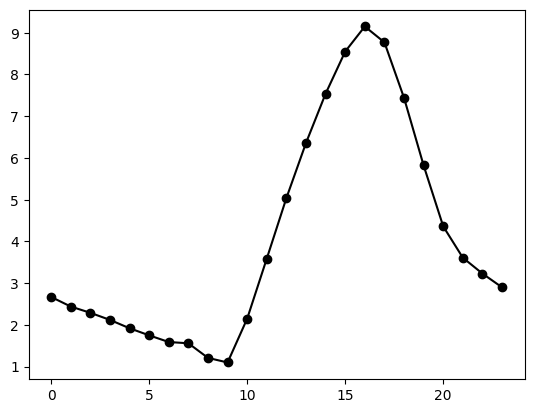

In [ ]:
Mes = 3
Dia = 5

plt.plot(dfhora[ (dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["HR"], dfhora[(dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["WS50M"], "-ko")
plt.ylabel("Tiempo")
plt.xlabel("Velocidad del viento [m/s]")

plt.plot()

[]

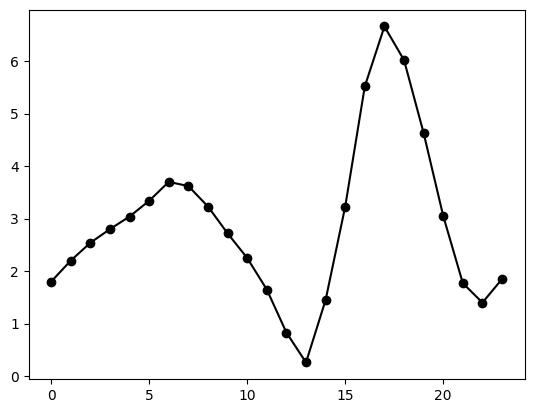

In [ ]:
Mes = 12
Dia = 13

plt.plot(dfhora[ (dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["HR"], dfhora[(dfhora["MO"] == Mes) & (dfhora["DY"] == Dia)]["WS50M"], "-ko")
plt.ylabel("Tiempo")
plt.xlabel("Velocidad del viento [m/s]")

plt.plot()

En las gráficas anteriores es posible notar que el viento tiene mayor velocidad en el horario de 2:00 p.m a 8:00 p.m

#Visualización de todo el conjunto de datos

In [ ]:
Y, X = np.histogram(dfhora[(dfhora["YEAR"] == 2021) & (dfhora["WS50M"] > 0) ]["WS50M"], bins= np.linspace(0, 10, 11 ))

Histograma de la frecuencia de velocidades del viento.

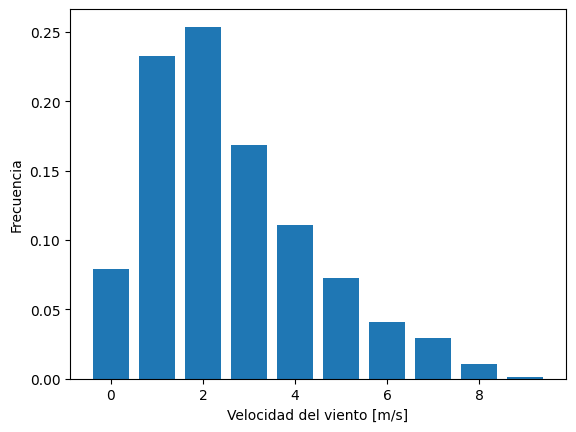

In [ ]:
Y, X = np.histogram(dfhora[(dfhora["YEAR"] == 2021) & (dfhora["WS50M"] > 0) ]["WS50M"], bins= np.linspace(0, 10, 11 ), density = 1)

plt.bar(X[:-1], Y)

plt.ylabel("Frecuencia")
plt.xlabel("Velocidad del viento [m/s]")

plt.show()

Número de días del año que tuvieron en horas especificas vientos con
velocidad mayor a 2 m/s.

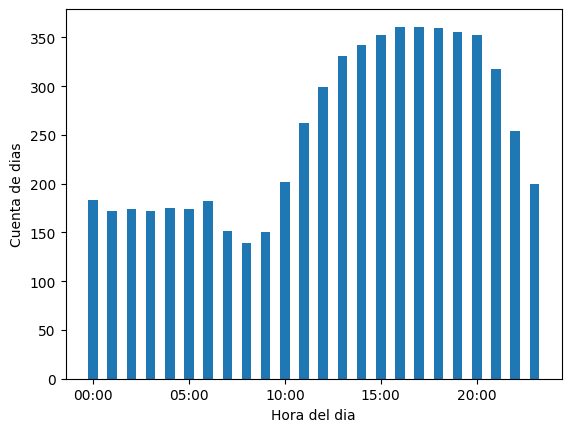

In [ ]:
Y, X = np.histogram(dfhora[(dfhora["YEAR"] == 2021) & (dfhora["WS50M"] >= 2) ]["HR"], bins= np.linspace(0, 24, 25 ), density = 0 )

plt.bar(X[:-1], Y, width = 0.5)

plt.xticks( np.linspace(0, 20, 5), ["00:00", "05:00", "10:00", "15:00", "20:00"] )

plt.ylabel("Cuenta de dias")
plt.xlabel("Hora del dia")

plt.show()

Número de días del año que tuvieron en horas especificas una irradiancia solar mayor a 500 W/m^2

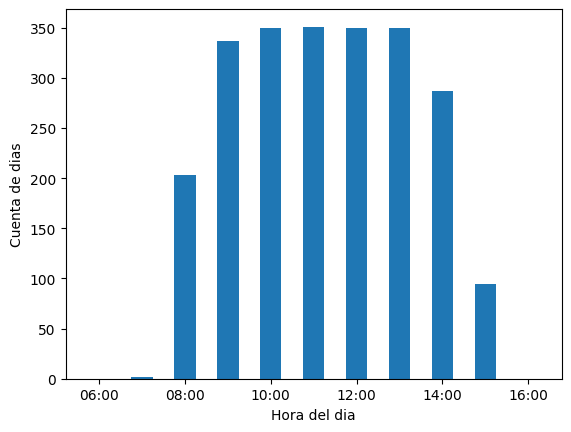

In [ ]:
Y, X = np.histogram(dfhora[(dfhora["YEAR"] == 2021) & (dfhora["ALLSKY_SFC_SW_DWN"] >= 500) ]["HR"], bins= np.linspace(6, 17, 12 ), density = 0  )

plt.bar(X[:-1], Y, width = 0.5)

plt.xticks( np.linspace(6, 16, 6), ["06:00", "08:00", "10:00", "12:00", "14:00", "16:00"] )


plt.ylabel("Cuenta de dias")
plt.xlabel("Hora del dia")

plt.show()

Con los datos analizados se encontró que en el municipio de Coahuayutla de 9 : 00 a 14 : 00 horas se cuenta con una irradiancia solar mayor a 500 W/m2 aproximadamente 350 días del año.

Después se buscaron el número de días en los que se presentaban velocidades de viento mayor a 2 m/s, se encontró que de 14 : 00 a 20 : 00 horas se cuenta con vientos de velocidad mayores que 2 m/s aproximadamente 350 días del a ̃no.

Se estima que la cantidad de energía generado con la irradiancia solar (de 9 : 00 a 14 : 00 horas) es 280 kWh. Para la estimación se consideró una eficiencia de 16 % para las celdas solares, 500 W/m2 de irradiancia solar y una superficie de celdas fotoeléctricas de 700 m2 .

Para la cantidad de energía generada con energía eólica se consideró que la turbina eólica tenía palas con longitud de r = 10 m (superficie de 314 m^2 ). Se tomó la densidad del aire como ρ = 1.29 kg/m3 , también se tomó en cuenta la ley de Betz.

Se estima que la potencia de una turbina eólica es 239 W, multiplicando por 6 horas (de 14:00 a 20:00 horas) tenemos 1.434 kWh. Con 55 turbinas eólicas tendríamos 79 kWh.